# Exemplo de código para solução do modelo SIR
### Premissas:
- Sem demografia
- População homogênea

### Sistema de equações diferenciais:
Denotando as frações de indivíduos suscetíveis, infectados e removidos por $S$, $I$ e $R$, respectivamente. Considerando uma taxa de propagação $\lambda$ e uma taxa de recuperação $\mu$ o sistema de equações diferenciais que descreve a evolução temporal desta dinâmica é dado por:

$$\dfrac{dS}{dt} = -\lambda S I$$

$$\dfrac{dI}{dt} = \lambda S I - \alpha I (I+R)$$

$$\dfrac{dR}{dt} =  \alpha I (I+R)$$

### Comentário:
Os parâmetros utilizados nestes examplos foram escolhidos unicamente para facilitar a visualização.

In [6]:
# Importando as bibliotecas necessárias

import numpy as np
from scipy.integrate import odeint
from matplotlib import pyplot as plt

plt.rcParams.update({'font.size': 26})  # increase the font size

### Função que define o sistema de equações diferenciais 

In [7]:
def MT (State, t):
    # State = [S, I, R]
        
    S = -lambdaRate*State[0]*State[1];
    I = lambdaRate*State[0]*State[1] - alphaRate*State[1]*(State[1] + State[2]);
    R = alphaRate*State[1]*(State[1] + State[2]);
    
    return [S, I, R];

In [8]:
# Parameters
lambdaRate = 5;
alphaRate = 1.0;

# Initial conditions
I_0 = 0.01;
R_0 = 0.0;
S_0 = 1.0 - I_0 - R_0;
y_0 = [S_0, I_0, R_0];

# time
t = np.linspace(0,7,1000)

yo = odeint(MT, y_0, t);

Plotando os resultados:

Uma vez que $S+I+R = 1$ a curva de ignorantes não foi mostrada.

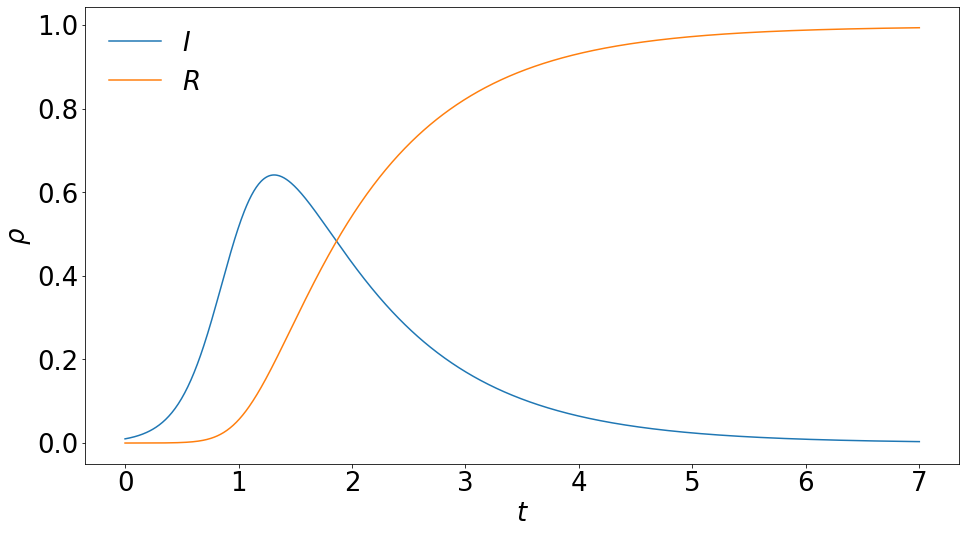

In [9]:
plt.figure(figsize=(14, 8));
# plt.plot(t, yo[:,0], label=r'$S$')
plt.plot(t, yo[:,1], label=r'$I$')
plt.plot(t, yo[:,2], label=r'$R$')
plt.legend(frameon=False);

plt.xlabel(r'$t$');
plt.ylabel(r'$\rho$');

# Saving figure
plt.tight_layout();
plt.savefig("MT_0.pdf")